In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json

In [188]:
with open("cpu_single_threaded.json") as f:
    cpu_st = json.load(f)
with open("cpu_multi_threaded.json") as f:
    cpu_mt = json.load(f)
with open("gpu_single_threaded.json") as f:
    gpu_st = json.load(f)
with open("gpu_multi_threaded.json") as f:
    gpu_mt = json.load(f)

In [189]:
iterations = list()
iterations.append(pd.DataFrame(data=[b for b in cpu_st["benchmarks"] if b["run_type"] == "iteration"]))
iterations.append(pd.DataFrame(data=[b for b in cpu_mt["benchmarks"] if b["run_type"] == "iteration"]))
iterations.append(pd.DataFrame(data=[b for b in gpu_st["benchmarks"] if b["run_type"] == "iteration"]))
iterations.append(pd.DataFrame(data=[b for b in gpu_mt["benchmarks"] if b["run_type"] == "iteration"]))
dataset = pd.concat(iterations)
dataset.reset_index(drop=True, inplace=True)
dataset

,name,family_index,per_family_instance_index,run_name,run_type,repetitions,repetition_index,threads,iterations,real_time,cpu_time,time_unit
0,RangeFixtureCpu/cpu_single_threaded/10,0,0,RangeFixtureCpu/cpu_single_threaded/10,iteration,20,0,1,1,57.199009,57.198684,s
1,RangeFixtureCpu/cpu_single_threaded/10,0,0,RangeFixtureCpu/cpu_single_threaded/10,iteration,20,1,1,1,53.973785,53.973713,s
2,RangeFixtureCpu/cpu_single_threaded/10,0,0,RangeFixtureCpu/cpu_single_threaded/10,iteration,20,2,1,1,54.491799,54.491784,s
3,RangeFixtureCpu/cpu_single_threaded/10,0,0,RangeFixtureCpu/cpu_single_threaded/10,iteration,20,3,1,1,58.376550,58.376530,s
4,RangeFixtureCpu/cpu_single_threaded/10,0,0,RangeFixtureCpu/cpu_single_threaded/10,iteration,20,4,1,1,56.808517,56.808448,s
...,...,...,...,...,...,...,...,...,...,...,...,...
875,RangeFixtureGpu/gpu_multi_threaded/20,0,10,RangeFixtureGpu/gpu_multi_threaded/20,iteration,20,15,1,10,1074.867915,64.825450,ms
876,RangeFixtureGpu/gpu_multi_threaded/20,0,10,RangeFixtureGpu/gpu_multi_threaded/20,iteration,20,16,1,10,1073.577323,66.390060,ms
877,RangeFixtureGpu/gpu_multi_threaded/20,0,10,RangeFixtureGpu/gpu_multi_threaded/20,iteration,20,17,1,10,1099.982056,65.212840,ms
878,RangeFixtureGpu/gpu_multi_threaded/20,0,10,RangeFixtureGpu/gpu_multi_threaded/20,iteration,20,18,1,10,1097.049553,65.051440,ms


In [190]:
aggregates = list()
aggregates.append(pd.DataFrame(data=[b for b in cpu_st["benchmarks"] if b["run_type"] == "aggregate"]))
aggregates.append(pd.DataFrame(data=[b for b in cpu_mt["benchmarks"] if b["run_type"] == "aggregate"]))
aggregates.append(pd.DataFrame(data=[b for b in gpu_st["benchmarks"] if b["run_type"] == "aggregate"]))
aggregates.append(pd.DataFrame(data=[b for b in gpu_mt["benchmarks"] if b["run_type"] == "aggregate"]))
dataset_aggr = pd.concat(aggregates)
dataset_aggr.reset_index(drop=True, inplace=True)
dataset_aggr


,name,family_index,per_family_instance_index,run_name,run_type,repetitions,threads,aggregate_name,aggregate_unit,iterations,real_time,cpu_time,time_unit
0,RangeFixtureCpu/cpu_single_threaded/10_mean,0,0,RangeFixtureCpu/cpu_single_threaded/10,aggregate,20,1,mean,time,20,56.237000,56.236940,s
1,RangeFixtureCpu/cpu_single_threaded/10_median,0,0,RangeFixtureCpu/cpu_single_threaded/10,aggregate,20,1,median,time,20,56.318552,56.318539,s
2,RangeFixtureCpu/cpu_single_threaded/10_stddev,0,0,RangeFixtureCpu/cpu_single_threaded/10,aggregate,20,1,stddev,time,20,1.509831,1.509817,s
3,RangeFixtureCpu/cpu_single_threaded/10_cv,0,0,RangeFixtureCpu/cpu_single_threaded/10,aggregate,20,1,cv,percentage,20,0.026848,0.026847,s
4,RangeFixtureCpu/cpu_single_threaded/11_mean,0,1,RangeFixtureCpu/cpu_single_threaded/11,aggregate,20,1,mean,time,20,61.055763,61.055729,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,RangeFixtureGpu/gpu_multi_threaded/19_cv,0,9,RangeFixtureGpu/gpu_multi_threaded/19,aggregate,20,1,cv,percentage,20,0.002817,0.022840,ms
172,RangeFixtureGpu/gpu_multi_threaded/20_mean,0,10,RangeFixtureGpu/gpu_multi_threaded/20,aggregate,20,1,mean,time,20,1066.905482,63.305572,ms
173,RangeFixtureGpu/gpu_multi_threaded/20_median,0,10,RangeFixtureGpu/gpu_multi_threaded/20,aggregate,20,1,median,time,20,1060.286220,63.077635,ms
174,RangeFixtureGpu/gpu_multi_threaded/20_stddev,0,10,RangeFixtureGpu/gpu_multi_threaded/20,aggregate,20,1,stddev,time,20,16.072170,2.036898,ms


In [191]:
benchmarks = dataset
benchmarks['k'] = benchmarks['name'].str.split('/').str[2]
benchmarks['device'] = benchmarks['name'].str.split('/').str[1].str.split('_').str[0]
benchmarks['threading'] = benchmarks['name'].str.split('/').str[1].str.split('_').str[1]

time_filter = benchmarks['time_unit'] == 'ms'
benchmarks.loc[time_filter, ['real_time']] /= 1000
benchmarks.loc[time_filter, ['cpu_time']] /= 1000
benchmarks.loc[time_filter, ['time_unit']] = 's'
benchmarks = benchmarks[['k', 'device', 'threading', 'repetitions', 'repetition_index', 'iterations', 'real_time', 'cpu_time', 'time_unit']]
benchmarks

,k,device,threading,repetitions,repetition_index,iterations,real_time,cpu_time,time_unit
0,10,cpu,single,20,0,1,57.199009,57.198684,s
1,10,cpu,single,20,1,1,53.973785,53.973713,s
2,10,cpu,single,20,2,1,54.491799,54.491784,s
3,10,cpu,single,20,3,1,58.376550,58.376530,s
4,10,cpu,single,20,4,1,56.808517,56.808448,s
...,...,...,...,...,...,...,...,...,...
875,20,gpu,multi,20,15,10,1.074868,0.064825,s
876,20,gpu,multi,20,16,10,1.073577,0.066390,s
877,20,gpu,multi,20,17,10,1.099982,0.065213,s
878,20,gpu,multi,20,18,10,1.097050,0.065051,s


In [192]:
metrics = dataset_aggr
metrics['k'] = metrics['per_family_instance_index'] + 10
metrics['device'] = metrics['name'].str.split('/').str[1].str.split('_').str[0]
metrics['threading'] = metrics['name'].str.split('/').str[1].str.split('_').str[1]

time_filter_m = (metrics['time_unit'] == "ms") & (metrics['aggregate_unit'] == "time")
metrics.loc[time_filter_m, 'real_time'] /= 1000
metrics.loc[time_filter_m, 'cpu_time'] /= 1000
metrics.loc[metrics['time_unit'] == "ms", 'time_unit'] = 's'
metrics = metrics[['k', 'device', 'threading', 'repetitions', 'aggregate_name', 'aggregate_unit', 'iterations', 'real_time', 'cpu_time', 'time_unit']]
metrics

,k,device,threading,repetitions,aggregate_name,aggregate_unit,iterations,real_time,cpu_time,time_unit
0,10,cpu,single,20,mean,time,20,56.237000,56.236940,s
1,10,cpu,single,20,median,time,20,56.318552,56.318539,s
2,10,cpu,single,20,stddev,time,20,1.509831,1.509817,s
3,10,cpu,single,20,cv,percentage,20,0.026848,0.026847,s
4,11,cpu,single,20,mean,time,20,61.055763,61.055729,s
...,...,...,...,...,...,...,...,...,...,...
171,19,gpu,multi,20,cv,percentage,20,0.002817,0.022840,s
172,20,gpu,multi,20,mean,time,20,1.066905,0.063306,s
173,20,gpu,multi,20,median,time,20,1.060286,0.063078,s
174,20,gpu,multi,20,stddev,time,20,0.016072,0.002037,s


In [193]:
benchmarks['type'] = benchmarks['device'] + '-' + benchmarks['threading']
metrics['type'] = metrics['device'] + '-' + metrics['threading']

/tmp/ipykernel_186740/1404259280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmarks['type'] = benchmarks['device'] + '-' + benchmarks['threading']
/tmp/ipykernel_186740/1404259280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics['type'] = metrics['device'] + '-' + metrics['threading']


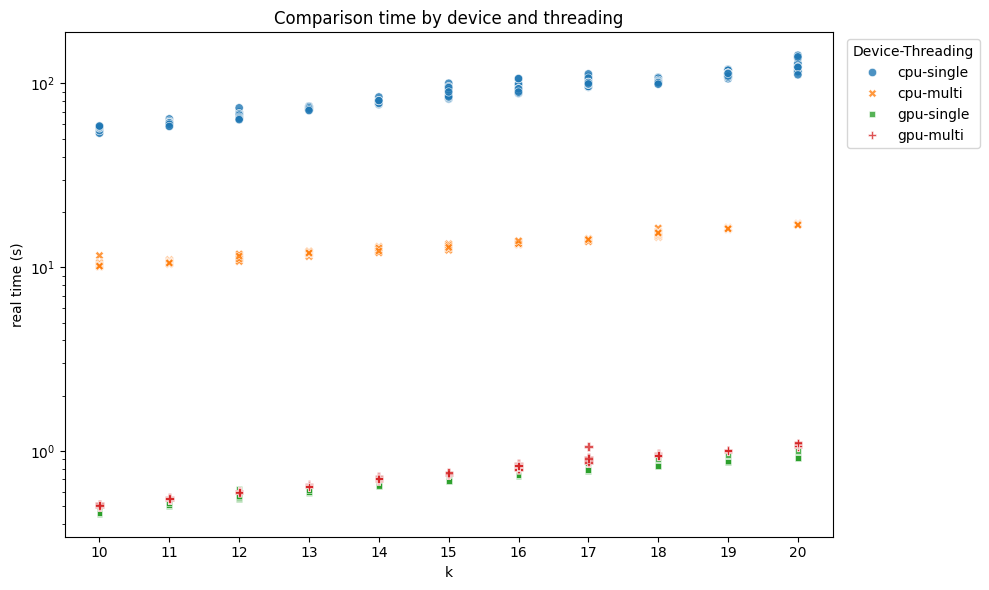

In [194]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=benchmarks, x='k', y='real_time', hue='type', style='type', alpha=0.8)
#sns.lineplot(data=benchmarks, x='k', y='real_time', hue='type', style='type', err_style=None)
plt.xlabel('k')
plt.ylabel('real time (s)')
plt.yscale('log')
plt.title('Comparison time by device and threading')
plt.legend(title='Device-Threading', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

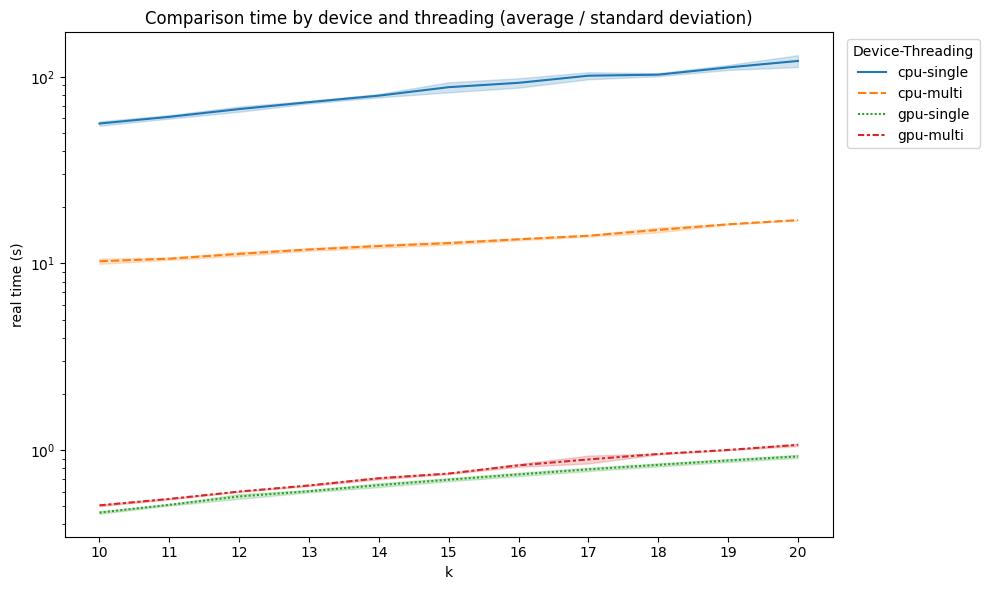

In [195]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=benchmarks, x='k', y='real_time', hue='type', style='type', errorbar='sd')
plt.xlabel('k')
plt.ylabel('real time (s)')
plt.yscale('log')
plt.title('Comparison time by device and threading (average / standard deviation)')
plt.legend(title='Device-Threading', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

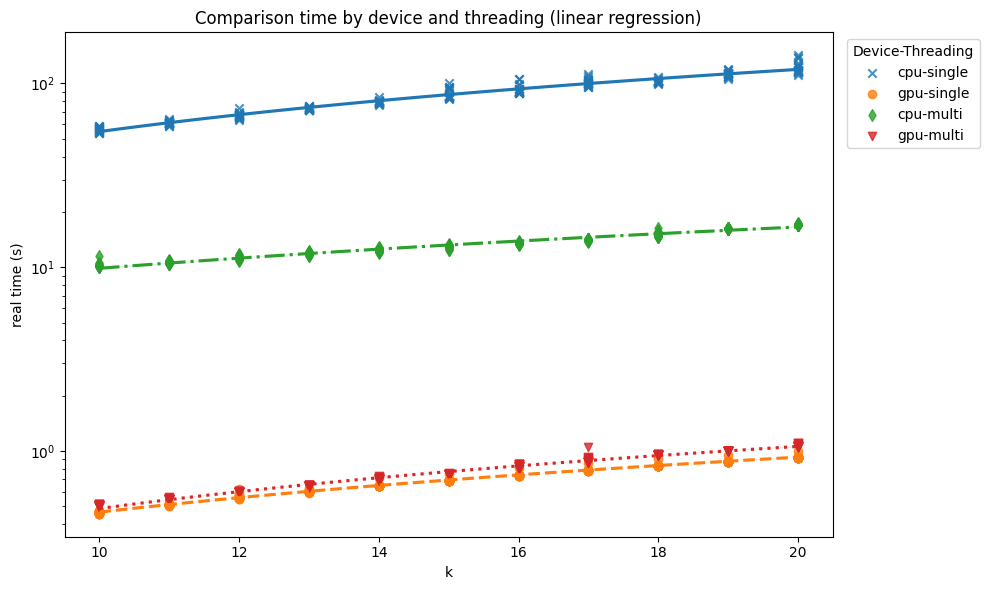

In [196]:
df_single = benchmarks.query('device=="cpu" & threading=="single"')
df_single_gpu = benchmarks.query('device=="gpu" & threading=="single"')
df_multi = benchmarks.query('device=="cpu" & threading=="multi"')
df_multi_gpu = benchmarks.query('device=="gpu" & threading=="multi"')

#sns.scatterplot(data=benchmarks, x='k', y='real_time', hue='type', alpha=0.7, legend=None)
#sns.lineplot(data=benchmarks.query('device=="cpu"'), x='k', y='real_time', hue='type', style='type', err_style=None, alpha=0.5)
plt.figure(figsize=(10, 6))
sns.regplot(x=pd.to_numeric(df_single['k']), y=pd.to_numeric(df_single['real_time']), label='cpu-single', marker='x')
sns.regplot(x=pd.to_numeric(df_single_gpu['k']), y=pd.to_numeric(df_single_gpu['real_time']), label='gpu-single', marker='o', line_kws={"ls":"--"})
sns.regplot(x=pd.to_numeric(df_multi['k']), y=pd.to_numeric(df_multi['real_time']), label='cpu-multi', line_kws={"ls":"-."}, marker='d')
sns.regplot(x=pd.to_numeric(df_multi_gpu['k']), y=pd.to_numeric(df_multi_gpu['real_time']), label='gpu-multi', line_kws={"ls":":"}, marker='v')
plt.xlabel('k')
plt.ylabel('real time (s)')
plt.yscale('log')
plt.title('Comparison time by device and threading (linear regression)')
plt.legend(title='Device-Threading', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

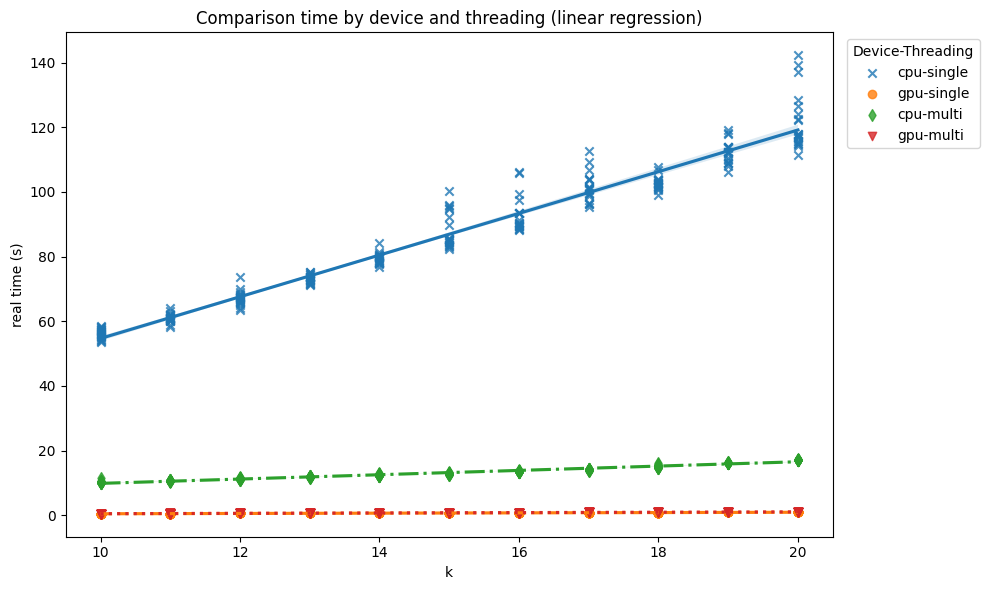

In [197]:
plt.figure(figsize=(10, 6))
sns.regplot(x=pd.to_numeric(df_single['k']), y=pd.to_numeric(df_single['real_time']), label='cpu-single', marker='x')
sns.regplot(x=pd.to_numeric(df_single_gpu['k']), y=pd.to_numeric(df_single_gpu['real_time']), label='gpu-single', marker='o', line_kws={"ls":"--"})
sns.regplot(x=pd.to_numeric(df_multi['k']), y=pd.to_numeric(df_multi['real_time']), label='cpu-multi', line_kws={"ls":"-."}, marker='d')
sns.regplot(x=pd.to_numeric(df_multi_gpu['k']), y=pd.to_numeric(df_multi_gpu['real_time']), label='gpu-multi', line_kws={"ls":":"}, marker='v')
plt.xlabel('k')
plt.ylabel('real time (s)')
plt.title('Comparison time by device and threading (linear regression)')
plt.legend(title='Device-Threading', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

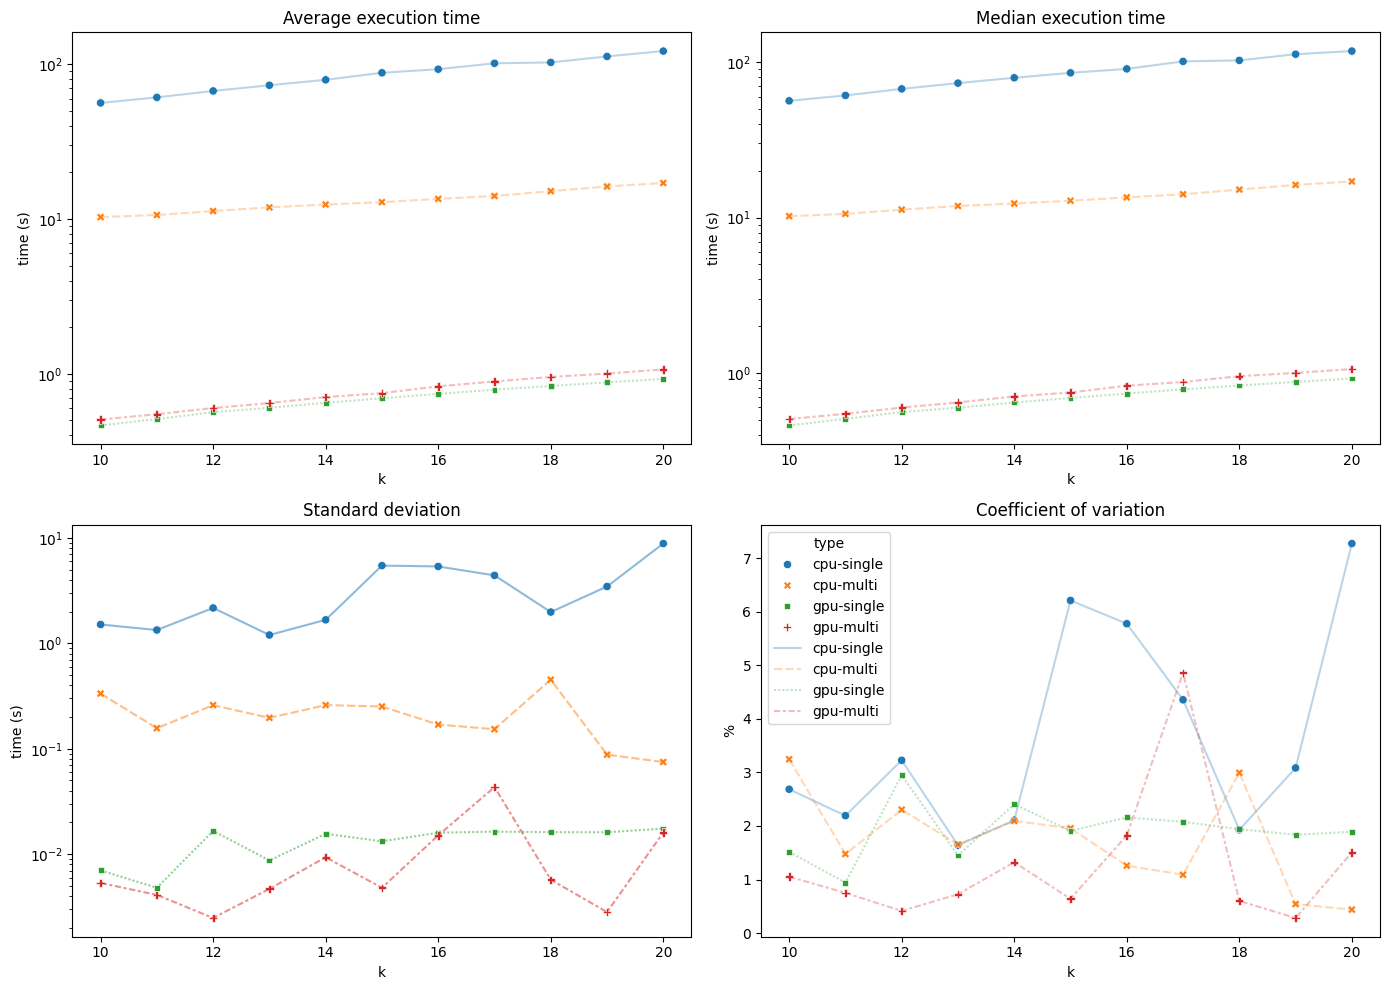

In [198]:
df_mean = metrics.query('aggregate_name=="mean"')
df_median = metrics.query('aggregate_name=="median"')
df_stddev = metrics.query('aggregate_name=="stddev"')
df_cv = metrics.query('aggregate_name=="cv"')

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(data=df_mean, x='k', y='real_time', hue='type', style='type', ax=axes[0, 0], legend=None)
sns.lineplot(data=df_mean, x='k', y='real_time', hue='type', style='type', ax=axes[0, 0], legend=None, alpha=0.3)
axes[0, 0].set_xlabel('k')
axes[0, 0].set_ylabel('time (s)')
axes[0, 0].set_yscale('log')
axes[0, 0].set_title('Average execution time')

sns.scatterplot(data=df_median, x='k', y='real_time', hue='type', style='type', ax=axes[0, 1], legend=None)
sns.lineplot(data=df_median, x='k', y='real_time', hue='type', style='type', ax=axes[0, 1], legend=None, alpha=0.3)
axes[0, 1].set_xlabel('k')
axes[0, 1].set_ylabel('time (s)')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('Median execution time')

sns.scatterplot(data=df_stddev, x='k', y='real_time', hue='type', style='type', ax=axes[1, 0], legend=None)
sns.lineplot(data=df_stddev, x='k', y='real_time', hue='type', style='type', ax=axes[1, 0], legend=None, alpha=0.5)
axes[1, 0].set_xlabel('k')
axes[1, 0].set_ylabel('time (s)')
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('Standard deviation')

sns.scatterplot(data=df_cv, x='k', y=df_cv['real_time'] * 100, hue='type', style='type', ax=axes[1, 1])
sns.lineplot(data=df_cv, x='k', y=df_cv['real_time'] * 100, hue='type', style='type', ax=axes[1, 1], alpha=0.3)
axes[1, 1].set_xlabel('k')
axes[1, 1].set_ylabel('%')
#axes[1, 1].set_ylim(0, 10)
axes[1, 1].set_title('Coefficient of variation')


#plt.legend(title='Device-Threading', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()

In [199]:
with open('gpu_range.json') as f:
    gpu_range = json.load(f)

iterations = list()
iterations.append(pd.DataFrame(data=[b for b in gpu_range["benchmarks"] if b["run_type"] == "iteration"]))
dataset = pd.concat(iterations)
dataset.reset_index(drop=True, inplace=True)

df = dataset
df['k'] = df['name'].str.split('/').str[2]
df['device'] = df['name'].str.split('/').str[1].str.split('_').str[0]
df['threading'] = df['name'].str.split('/').str[1].str.split('_').str[1]

time_filter = df['time_unit'] == 'ms'
df.loc[time_filter, ['real_time']] /= 1000
df.loc[time_filter, ['cpu_time']] /= 1000
df.loc[time_filter, ['time_unit']] = 's'
df = df[['k', 'device', 'threading', 'repetitions', 'repetition_index', 'iterations', 'real_time', 'cpu_time', 'time_unit']]
df['k'] = pd.to_numeric(df['k'])
df2 = benchmarks.drop(['type'], axis=1)
df_gpu = pd.concat([df2.query('device=="gpu" & threading=="single"'), df.query('k > 20')]).reset_index()
df_gpu

/tmp/ipykernel_186740/3584236049.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['k'] = pd.to_numeric(df['k'])


,index,k,device,threading,repetitions,repetition_index,iterations,real_time,cpu_time,time_unit
0,440,10,gpu,single,20,0,2,0.469953,0.469793,s
1,441,10,gpu,single,20,1,2,0.473188,0.473186,s
2,442,10,gpu,single,20,2,2,0.474027,0.474025,s
3,443,10,gpu,single,20,3,2,0.474179,0.474178,s
4,444,10,gpu,single,20,4,2,0.473081,0.473080,s
...,...,...,...,...,...,...,...,...,...,...
475,315,85,gpu,single,20,15,1,3.901909,3.901734,s
476,316,85,gpu,single,20,16,1,3.908231,3.908015,s
477,317,85,gpu,single,20,17,1,3.931636,3.931474,s
478,318,85,gpu,single,20,18,1,3.922410,3.922222,s


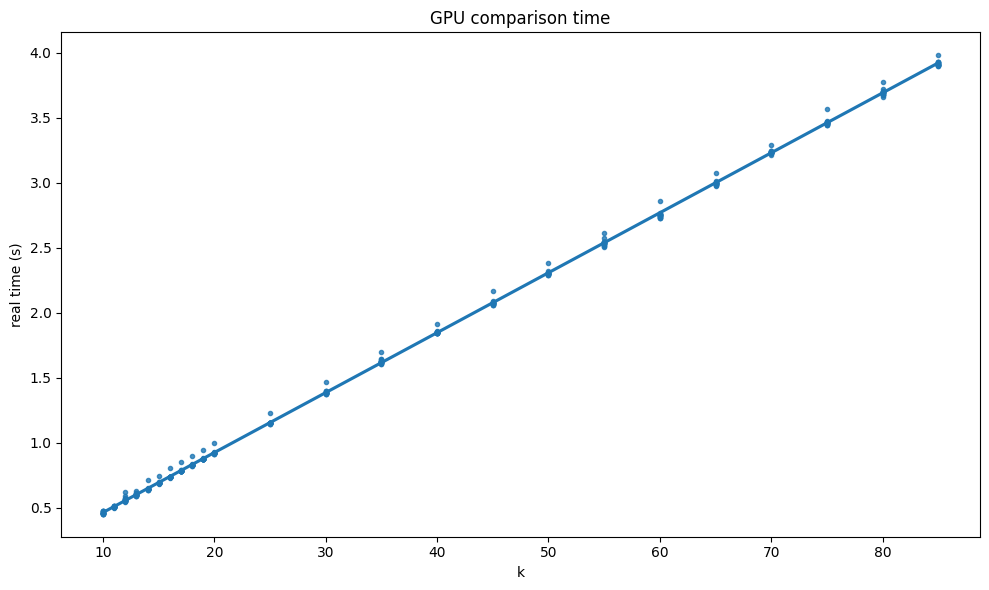

In [223]:
plt.figure(figsize=(10, 6))
sns.regplot(x=pd.to_numeric(df_gpu['k']), y=pd.to_numeric(df_gpu['real_time']), label='gpu-single', marker='.')
plt.xlabel('k')
plt.ylabel('real time (s)')
plt.title('GPU comparison time')
plt.tight_layout()
plt.show()

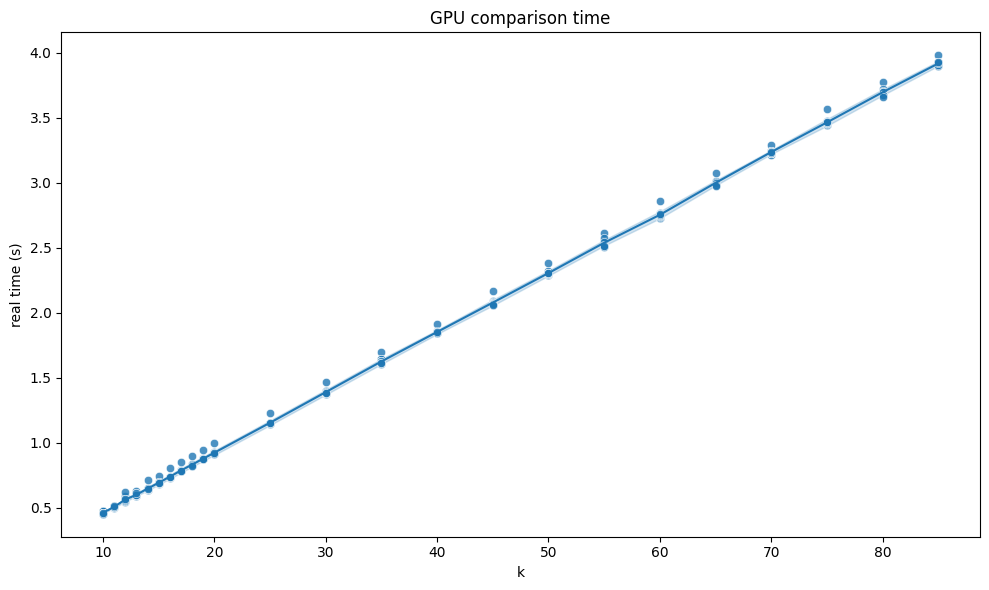

In [222]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=pd.to_numeric(df_gpu['k']), y=pd.to_numeric(df_gpu['real_time']), errorbar='sd')
sns.scatterplot(x=pd.to_numeric(df_gpu['k']), y=pd.to_numeric(df_gpu['real_time']), alpha=0.8)
plt.xlabel('k')
plt.ylabel('real time (s)')
plt.title('GPU comparison time')
plt.tight_layout()
plt.show()